In [28]:
import numpy as num
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

def f(r,q,N,fe,beta,re,lam):
    return fe*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)*(1-q/float(N))

def phiN(r,A,alpha,re,kappa):
    return A*num.exp(-alpha*(r/re-1))/(1+(r/re-kappa)**20)


def phiE(r,B,beta,re,lam):
    return B*num.exp(-beta*(r/re-1))/(1+(r/re-lam)**20)

def phiT(r,A,alpha,re,B,beta,kappa,lam):
    return phiN(r,A,alpha,re,kappa)-phiE(r,B,beta,re,lam)


def Johnson(f1,f2,phi1,phi2):
    return (1/2)*((f1/f2)*phi2+(f2/f1)*phi1)

In [43]:
class Al:
    re=2.86392
    fe=1.20378
    alpha=6.61317
    beta=3.52702
    A=0.31487
    B=0.36555
    kappa=0.37985
    lam=0.75969
    
class Ni:
    re,fe,alpha,beta,A,B,kappa,lam=2.49975,2.21149,8.38345,4.47117,0.42905,0.63353,0.44360,0.82066
    
class Co:
    re,fe,alpha,beta,A,B,kappa,lam=2.50598,2.31544,8.67963,4.62913,0.42138,0.64011,0.50000,1.0000
    
class O:
    re,A,alpha,B,beta,lam,fe,kappa=3.64857,0.34900,5.44072,0.57438,3.59746,0.39310,1.39479,0.08007
    gamma,nu=2.11725,0.37457
class AlO:
    re,alpha,beta,A,B,kappa,lam=2.98520,8.49741,4.52114,0.09738,0.38121,0.18967,0.95234
    
    
    


In [44]:
r=num.linspace(0,6,1000)

In [45]:
Al=Al()
Ni=Ni()
Co=Co()
O=O()
AlO=AlO()

(-0.5, 3)

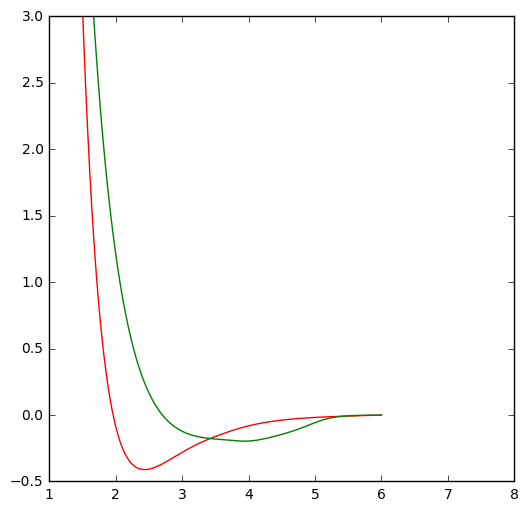

In [57]:
fAl=f(r,0,3,Al.fe,Al.beta,Al.re,Al.lam)
fO=f(r,0,3,O.fe,O.gamma,O.re,O.nu)

phiAl= phiT(r,Al.A,Al.alpha,Al.re,Al.B,Al.beta,Al.kappa,Al.lam)
phiO= phiT(r,O.A,O.alpha,O.re,O.B,O.beta,O.kappa,O.lam)
phiAlO=phiT(r,AlO.A,AlO.alpha,AlO.re,AlO.B,AlO.beta,AlO.kappa,AlO.lam)

phiAlO_Johnson=Johnson(fAl,fO,phiAl,phiO)

figAl=plt.figure(figsize=(6,6))
ax=figAl.add_subplot(1,1,1)
ax.plot(r,phiAlO,'r')
ax.plot(r,phiAlO_Johnson,"g")
ax.set_xlim([1,8])
ax.set_ylim([-.5,3])
